### Multiple Linear Regression

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df_index = pd.read_csv('economic_index.csv')
df_index.head(8)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195


In [5]:
## Drop unnecessary columns
df_index.drop(columns = ["Unnamed: 0", "year", "month"],axis =1,inplace = True)

In [6]:
df_index.head(8)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195


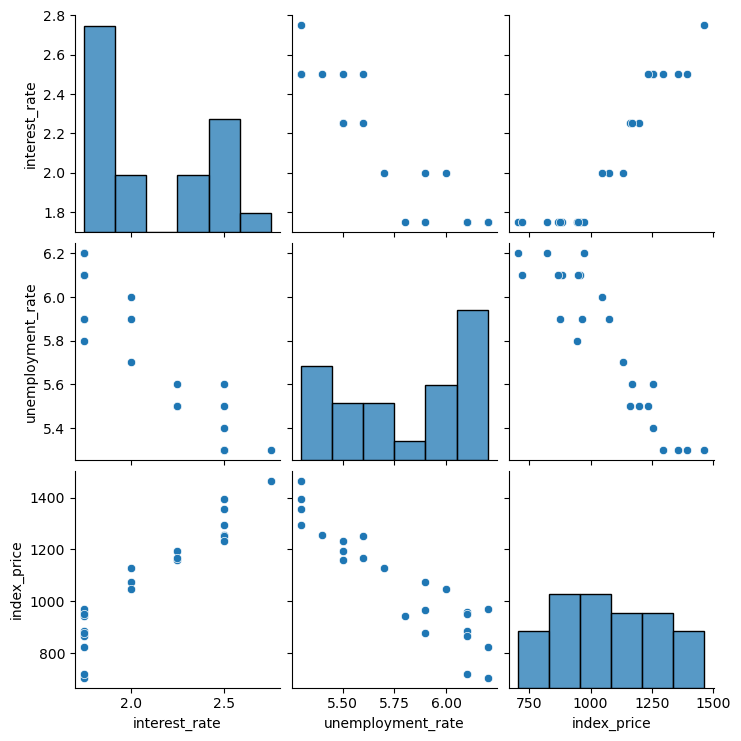

In [7]:
## Visualization
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment')

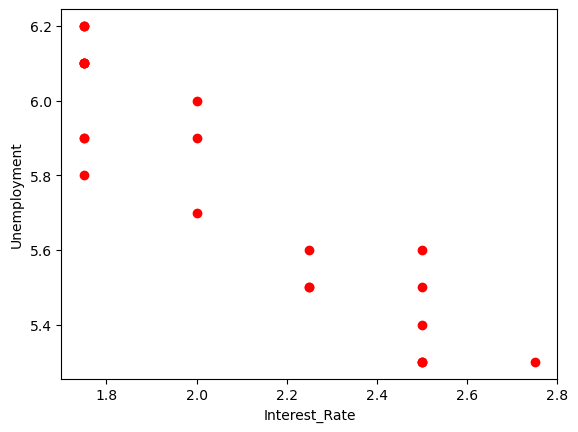

In [10]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest_Rate")
plt.ylabel("Unemployment")


In [11]:
## Independent and Dependent feature
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25,random_state = 42) 


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

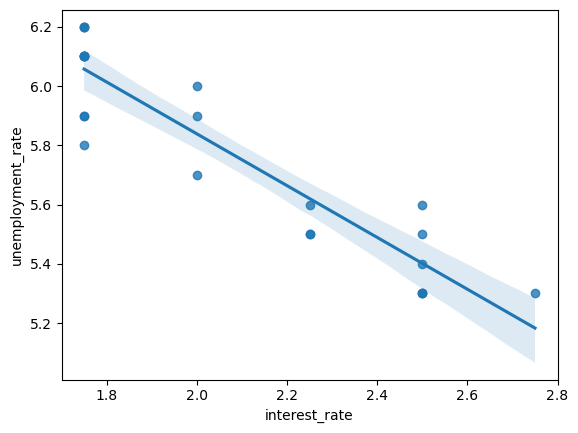

In [17]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
## Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)


In [23]:
np.mean(validation_score)

-5914.828180162389

In [24]:
## Prediction
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse =np.sqrt(mse)
print(f"MSE:{mse}\n")
print(f"MAE:{mae}\n")
print(f"RMSE:{rmse}\n")

MSE:5793.76288771258

MAE:59.93578152323554

RMSE:76.11677139574813



In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(F"R2_score:{score}\n")
print("ADJUSTED_R2:")
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R2_score:0.8278978091457142

ADJUSTED_R2:
0.713163015242857


### Assumptions

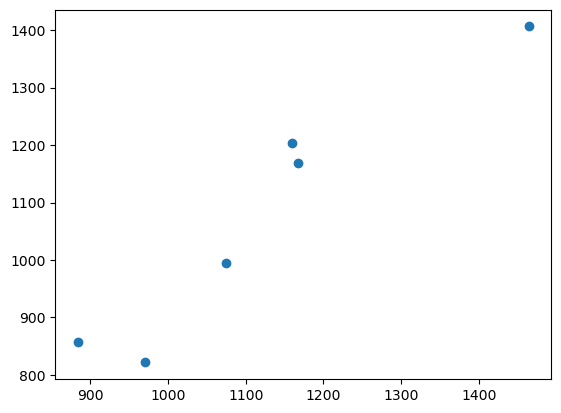

In [29]:
plt.scatter(y_test, y_pred)

In [31]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


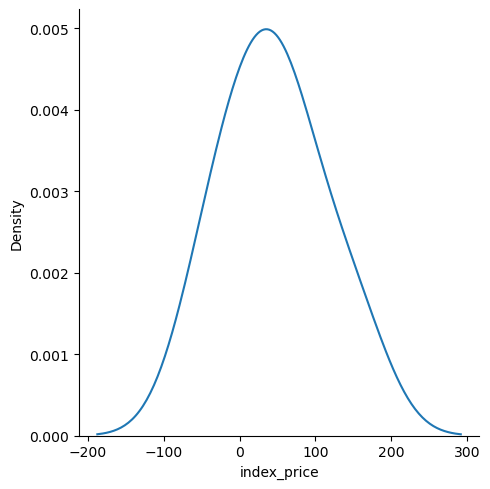

In [33]:
## Plot the Residuals
sns.displot(residuals,kind = 'kde')

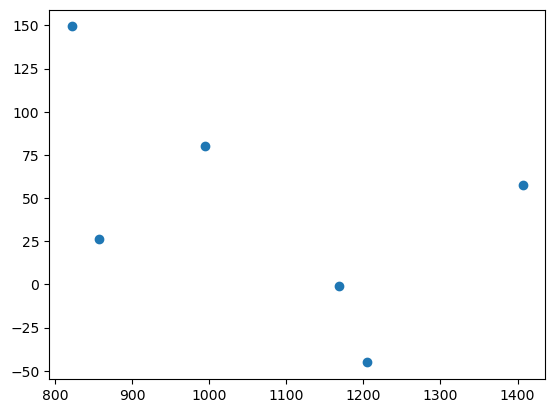

In [34]:
## Plotting plot respect to the residual and prediction
plt.scatter(y_pred, residuals)

Here the plot does not show any pattern , it shows uniform distribution

In [35]:
import statsmodels.api as sm


In [37]:
model=sm.OLS(y_train,X_train).fit()

In [39]:
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [40]:
model.summary()

/home/aadharsh/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 27 Mar 2025   Prob (F-statistic):                       0.754
Time:                        01:47:19   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443
